# The MLE case and the comparison with the five benthic sites

In [4]:
%load_ext autoreload
%autoreload 2

import os
import x4c
import xarray as xr
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
print(x4c.__version__)
os.chdir('/glade/work/fengzhu/Projects/paper-MCO_iCESM/notebooks')
!hostname

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
2025.6.14
crhtc76


## Get the MLE case

In [5]:
df_CO2pdf = pd.read_csv('../data/df_CO2pdf.csv')
idx = np.argmax(df_CO2pdf['density'])
print(idx)
print(df_CO2pdf.loc[idx])

371
CO2        2.511326
density    2.815823
dBWT       6.120243
dGMST      8.037227
dGMSST     6.634421
Name: 371, dtype: float64


In [6]:
TEMP = {}
TEMP['3x'] = x4c.open_dataset('../data/iCESM1.3_3x_TEMP_clim_eq.nc')['TEMP']
TEMP['1.5x'] = x4c.open_dataset('../data/iCESM1.3_1.5x_TEMP_clim_eq.nc')['TEMP']
TEMP['PI'] = x4c.open_dataset('../data/iCESM1.3_PI_TEMP_clim_eq.nc')['TEMP']

In [ ]:
d18Osw = {}
d18Osw['3x'] = x4c.open_dataset('../data/iCESM1.3_3x_d18Osw_clim_eq.nc')['d18Osw'] + 0.72 - 0.55      # MCO global mean: d18Osw = -0.55
d18Osw['1.5x'] = x4c.open_dataset('../data/iCESM1.3_1.5x_d18Osw_clim_eq.nc')['d18Osw'] + 0.49 - 0.55  # MCO global mean: d18Osw = -0.55
d18Osw['PI'] = x4c.open_dataset('../data/iCESM1.3_PI_d18Osw_clim_eq.nc')['d18Osw']

In [9]:
# extrpolate to get 6x
TEMP['6x'] = TEMP['3x'] + (TEMP['3x'] - TEMP['1.5x'])
d18Osw['6x'] = d18Osw['3x'] + (d18Osw['3x'] - d18Osw['1.5x'])

In [10]:
TEMP_interp = np.linspace(TEMP['1.5x'].values, TEMP['6x'].values, len(df_CO2pdf))
d18Osw_interp = np.linspace(d18Osw['1.5x'].values, d18Osw['6x'].values, len(df_CO2pdf))

In [11]:
TEMP['mle'] = TEMP['3x'].copy()
TEMP['mle'].values = TEMP_interp[idx]
d18Osw['mle'] = d18Osw['3x'].copy()
d18Osw['mle'].values = d18Osw_interp[idx]

In [12]:
dz = x4c.open_dataset('../data/iCESM1.3_dz.nc')['dz']
TEMP['mle'].attrs['dz'] = dz
d18Osw['mle'].attrs['dz'] = dz

In [13]:
BWT = TEMP['mle'].x.zavg(3e5, None)
BWd18Osw = d18Osw['mle'].x.zavg(3e5, None)

In [ ]:
def d18Ob_M14(T, d18Osw, DpH):
    d18Ob = (d18Osw-0.27) + (-0.245*T+0.0011*T*T + 3.58) - 1.5435*DpH
    return d18Ob

# BWd18Ob = d18Ob_M14(BWT, BWd18Osw, DpH=-0.2V

In [15]:
MCO_period = [14.5, 16.75]  # B21
df_sites = pd.read_csv('../data/df_d18Ob_sites_model_vals.csv')

## Visualization

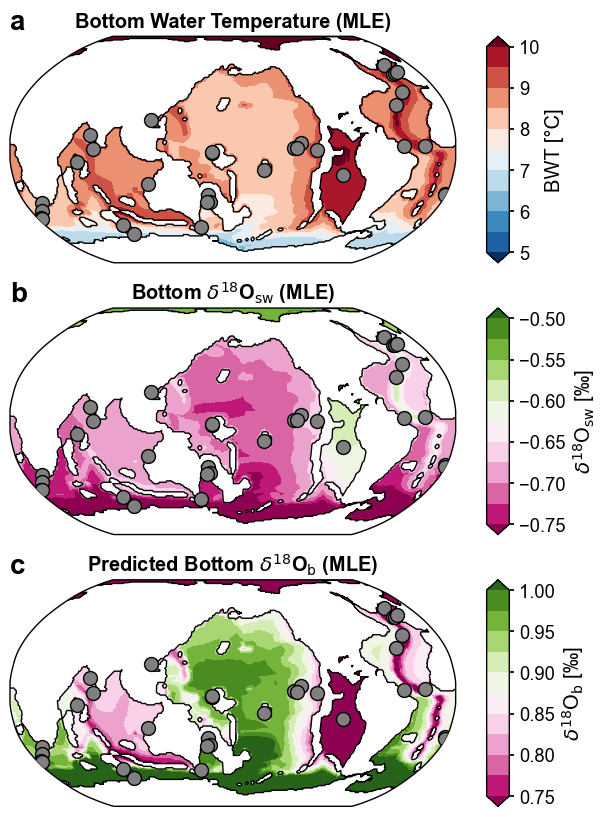

Figure saved at: "../figs/Fig.02.pdf"


In [16]:
import cartopy.crs as ccrs

x4c.set_style('journal_spines', font_scale=1.2)
fig, ax = x4c.visual.subplots(
    figsize=(8, 10),
    nrow=3, ncol=1,
    hspace=0.2, wspace=0.1,
    ax_loc={
        'map_bwt': (0, 0),
        'map_d18Osw': (1, 0),
        'map_d18Ob': (2, 0),
    },
    projs={
        'map_bwt': 'Robinson',
        'map_d18Osw': 'Robinson',
        'map_d18Ob': 'Robinson',
    },
    projs_kws={
        'map_bwt': {'central_longitude': 180},
        'map_d18Osw': {'central_longitude': 180},
        'map_d18Ob': {'central_longitude': 180},
    },
    annotation=True,
    annotation_separate=True,
    annotation_kws={
        'map_bwt': {'loc_x': 0., 'style': ''},
        'map_d18Osw': {'loc_x': 0., 'style': ''},
        'map_d18Ob': {'loc_x': 0., 'style': ''},
    },
)

ms = 100
frac = 0.1
aspect = 15
BWT.x.plot(
    ax=ax['map_bwt'],
    cmap='RdBu_r',
    df_sites=df_sites,
    site_markersizes=ms,
    legend=False,
    colname_dict={
        'lat': 'paleo_lat',
        'lon': 'paleo_lon',
    }, 
    levels=np.linspace(5, 10, 11),
    cbar_kwargs={
        'label': 'BWT [°C]',
        'ticks': np.linspace(5, 10, 6),
    },
)

BWd18Osw.x.plot(
    ax=ax['map_d18Osw'],
    cmap='PiYG',
    df_sites=df_sites,
    site_markersizes=ms,
    legend=False,
    colname_dict={
        'lat': 'paleo_lat',
        'lon': 'paleo_lon',
    }, 
    levels=np.linspace(-0.75, -0.5, 11),
    cbar_kwargs={
        'label': r'$\delta^{18}$O$_{\text{sw}}$ [‰]',
    },
)

BWd18Ob.x.plot(
    ax=ax['map_d18Ob'],
    cmap='PiYG',
    df_sites=df_sites,
    site_markersizes=ms,
    legend=False,
    colname_dict={
        'lat': 'paleo_lat',
        'lon': 'paleo_lon',
    }, 
    levels=np.linspace(0.75, 1, 11),
    cbar_kwargs={
        'label': r'$\delta^{18}$O$_{\text{b}}$ [‰]',
        'ticks': np.linspace(0.75, 1, 6),
    },
)

ax['map_bwt'].set_title(f'Bottom Water Temperature (MLE)', weight='bold')
ax['map_d18Osw'].set_title(r'Bottom $\delta^{18}$O$_{\text{sw}}$'+f' (MLE)', weight='bold')
ax['map_d18Ob'].set_title(r'Predicted Bottom $\delta^{18}$O$_{\text{b}}$'+f' (MLE)', weight='bold')

x4c.showfig(fig)
x4c.savefig(fig, '../figs/Fig.02.pdf')